In [1]:
#Program 1: Program the compute binomial coefficients efficiently
def C(n,k):
    #This is just in case n and k are flipped when getting the coefficients
    if k>n:
        return "Error: n can't be smaller than k"
    else:
        #Start with 1 combination as there is always at least 1
        total = 1
        for i in range(k):
            #Multiple by n!/(n-k)!
            total *= (n-i)
            #Then divide by k!
            total //= (i+1)
        return total

In [2]:
#Test
C(52,5)

2598960

In [3]:
#Test
C(10,5)

252

Now my next task is to figure out what values of n and k, such that $C(n,k)$ is an odd number

In [4]:
#So I started out just printing some examples, but just couldn't find a particular pattern
print(30,5,C(30,5)%2)
print(31,5,C(31,5)%2)
print(32,5,C(32,5)%2)
print(33,5,C(33,5)%2)
print(30,6,C(30,6)%2)
print(31,6,C(31,6)%2)
print(32,6,C(32,6)%2)
print(33,6,C(33,6)%2)

30 5 0
31 5 1
32 5 0
33 5 0
30 6 1
31 6 1
32 6 0
33 6 0


After awhile of tring different variations, I had to take a break for awhile as I was getting frustrated. When I came back, I just said, "F*** it, I'll just graph it cause I don't know." Upon doing this, I got this:

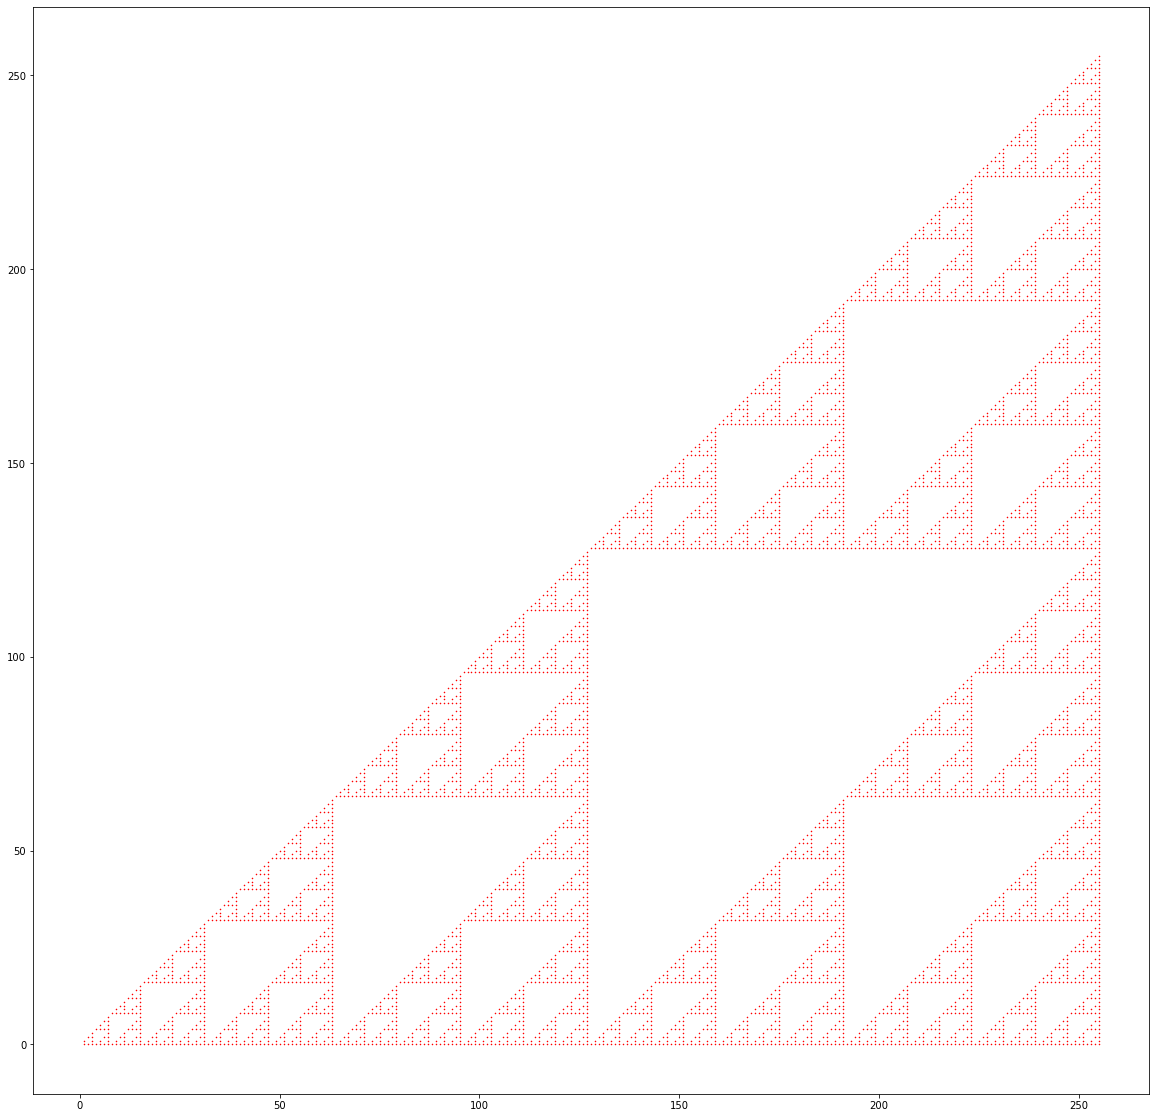

In [5]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(20, 20))
for i in range(1,256):
    for j in range(0,i+1):
        if C(i,j)%2 == 1:
            plt.plot(i,j,'r*',markersize=1)

Now that definetly has a pattern. I know some of the values involved with the binomial coefficients are values in the pascal triangle, but I had no clue as to what it could really visually look like. I don't have a proof as to why it happend, but this is all I have found so far when the binomial coefficents are odd

In [6]:
#I just copy and pasted my algorithm from a previous hw just to help find gcd
def Euclids_Alg(x,y):
    #This is just an if statement for arranging the values, with y being the greater number between the two
    if (x>y):
        x,y = y,x
    #Keep track of old x because as soon as x reaches 0, then the last x will be the gcd
    oldx = x
    while x > 0:
       # print(x,y)
        #y = x*(some integer) + remainder
        #newx = remainder and y = x
        x = y%x
        y = oldx
        if (x != 0):
            oldx = x
        
    return oldx

In [7]:
#Program 2: this isn't really a function, but three tests to compare numbers from 1 to n that are coprime
#In this case n=100
counter1 = 0
total1 = 100**2
for x in range(1,101):
    for y in range(1,101):
        if Euclids_Alg(x,y)==1:
            counter1 += 1
#print(counter)
perc1 = counter1/total1
print(perc1)

0.6087


In [8]:
#In this case n=1000
counter2 = 0
total2 = 1000**2
for x in range(1,1001):
    for y in range(1,1001):
        if Euclids_Alg(x,y)==1:
            counter2 += 1
perc2 = counter2/total2
print(perc2)

0.608383


In [9]:
#In this case n=10000
counter3 = 0
total3 = 10000**2
for x in range(1,10001):
    for y in range(1,10001):
        
        if Euclids_Alg(x,y)==1:
            counter3 += 1
perc3 = counter3/total3
print(perc3)

0.60794971


In [10]:
#Took the average of the three probabilities
avgPerc = (perc1 + perc2 + perc3)/3
print(avgPerc)

0.6083442366666667


Based on these three examples with n values of size 100,1000, and 10000, the average percentage of $gcd(x,y)=1$ is approximately 0.608, or rather, $60.8\%$. Upon researching the topic, many sources have said that the average probability of two numbers having a gcd of 1, or are coprimes, is about $\frac{6}{\pi^2}$, which if you compute comes out to about 0.61, which is pretty close to what I got above.

In [11]:
import math
print(6/(math.pi)**2)

0.6079271018540267


In [12]:
x=123456
a=[]
for i in range(len(str(x))):
    digit = str(x)[i]
    a.append(int(digit))
print(a)

[1, 2, 3, 4, 5, 6]


In [13]:
#Program 3: Generates the next permutation given in lexicographic order
def next_perm(A):
    n=len(A)
    i=n-1
    #start reading throughfrom right to left and finds the first number out of order
    while i>0 and A[i-1]>=A[i]:
        i -= 1
        
    i-=1
    j=n-1
    
    #Find the next number that comes after the one found for i
    while A[i] >= A[j]:
        j-=1
        
    #Then swaps the two
    A[i],A[j] = A[j],A[i]
    
    #Finally flip everything after farthest left number switch
    start = i+1
    stop = len(A)-1
    while start < stop:
        A[start], A[stop] = A[stop], A[start]
        start += 1
        stop -= 1
    print(A)
    return A

In [14]:
#test
next_perm([8,9,3,6,5,4,2,1])

[8, 9, 4, 1, 2, 3, 5, 6]


[8, 9, 4, 1, 2, 3, 5, 6]

In [15]:
#Finds the next 50 permutations in order
x=[8,9,3,6,5,4,2,1]
for i in range(50):
    x = next_perm(x)

[8, 9, 4, 1, 2, 3, 5, 6]
[8, 9, 4, 1, 2, 3, 6, 5]
[8, 9, 4, 1, 2, 5, 3, 6]
[8, 9, 4, 1, 2, 5, 6, 3]
[8, 9, 4, 1, 2, 6, 3, 5]
[8, 9, 4, 1, 2, 6, 5, 3]
[8, 9, 4, 1, 3, 2, 5, 6]
[8, 9, 4, 1, 3, 2, 6, 5]
[8, 9, 4, 1, 3, 5, 2, 6]
[8, 9, 4, 1, 3, 5, 6, 2]
[8, 9, 4, 1, 3, 6, 2, 5]
[8, 9, 4, 1, 3, 6, 5, 2]
[8, 9, 4, 1, 5, 2, 3, 6]
[8, 9, 4, 1, 5, 2, 6, 3]
[8, 9, 4, 1, 5, 3, 2, 6]
[8, 9, 4, 1, 5, 3, 6, 2]
[8, 9, 4, 1, 5, 6, 2, 3]
[8, 9, 4, 1, 5, 6, 3, 2]
[8, 9, 4, 1, 6, 2, 3, 5]
[8, 9, 4, 1, 6, 2, 5, 3]
[8, 9, 4, 1, 6, 3, 2, 5]
[8, 9, 4, 1, 6, 3, 5, 2]
[8, 9, 4, 1, 6, 5, 2, 3]
[8, 9, 4, 1, 6, 5, 3, 2]
[8, 9, 4, 2, 1, 3, 5, 6]
[8, 9, 4, 2, 1, 3, 6, 5]
[8, 9, 4, 2, 1, 5, 3, 6]
[8, 9, 4, 2, 1, 5, 6, 3]
[8, 9, 4, 2, 1, 6, 3, 5]
[8, 9, 4, 2, 1, 6, 5, 3]
[8, 9, 4, 2, 3, 1, 5, 6]
[8, 9, 4, 2, 3, 1, 6, 5]
[8, 9, 4, 2, 3, 5, 1, 6]
[8, 9, 4, 2, 3, 5, 6, 1]
[8, 9, 4, 2, 3, 6, 1, 5]
[8, 9, 4, 2, 3, 6, 5, 1]
[8, 9, 4, 2, 5, 1, 3, 6]
[8, 9, 4, 2, 5, 1, 6, 3]
[8, 9, 4, 2, 5, 3, 1, 6]
[8, 9, 4, 2, 5, 3, 6, 1]


In [16]:
#Program 4: Next combination in lexicographic order
def next_comb(A,r,n):
    #Start at right end of r-combination and iterate left till it finds first number less than its placement of an n value
    i = r-1
    while (A[i] > n - r + i):
        #print(A[i],n - r + i)
        i = i - 1;
        if i < 0:
            print("The array inputed is already the highest array in lexicographic order. So I will just return it as is.")
            return A
    #Add that chosen element by 1
    A[i] = A[i] + 1;
    #Fix combo so numbers before are less than and numbers after are greater
    for j in range(i+1,r):   
          A[j] = A[i] + j - i;
    print(A)
    return A

In [17]:
#test
next_comb([1,2,5,6],4,6)

[1, 3, 4, 5]


[1, 3, 4, 5]

In [18]:
#Test, did it so highest lexicographic order is reach so I can test my error
a=[1,2,3,4]
for i in range(20):
    a = next_comb(a,4,6)

[1, 2, 3, 5]
[1, 2, 3, 6]
[1, 2, 4, 5]
[1, 2, 4, 6]
[1, 2, 5, 6]
[1, 3, 4, 5]
[1, 3, 4, 6]
[1, 3, 5, 6]
[1, 4, 5, 6]
[2, 3, 4, 5]
[2, 3, 4, 6]
[2, 3, 5, 6]
[2, 4, 5, 6]
[3, 4, 5, 6]
The array inputed is already the highest array in lexicographic order. So I will just return it as is.
The array inputed is already the highest array in lexicographic order. So I will just return it as is.
The array inputed is already the highest array in lexicographic order. So I will just return it as is.
The array inputed is already the highest array in lexicographic order. So I will just return it as is.
The array inputed is already the highest array in lexicographic order. So I will just return it as is.
The array inputed is already the highest array in lexicographic order. So I will just return it as is.


In [19]:
#Another test for error
next_comb([3,4,5,6],4,6)

The array inputed is already the highest array in lexicographic order. So I will just return it as is.


[3, 4, 5, 6]

In [20]:
#test
next_comb([1,2,3],3,6)

[1, 2, 4]


[1, 2, 4]

In [21]:
#Binary to decimal converter that will help with my adding binary program
def bin_dec(bi):
    dec = 0
    power = 0
    while (bi > 0):
        bValue = bi%10
        dec += bValue * 2**power
        bi = bi//10
        power+=1
    return dec
#Decimal to binary converter
def dec_bin(n):
    stringReturn = ""
    while n>=1:
        stringReturn = str(n%2) + stringReturn
        n = n//2
    return int(stringReturn)

In [22]:
#Program 5: Used previous code that simply added binary numbers by 1
def next_1(b):
    temp = bin_dec(b)+1
    b = dec_bin(temp)
    return b

In [23]:
next_1(1101)

1110

In [24]:
#Program 6: generates all bit strings of length 8 with 3 1's and 5 0's
def g8b():
    #I simply got all combinations of [1,2,3] and placed 1's to that position in an array of 8 0's
    arr = [1,2,3]
    for i in range(C(8,3)):
        newArr = [0]*8
        p1,p2,p3 = arr[0]-1,arr[1]-1,arr[2]-1
        newArr[p1],newArr[p2],newArr[p3] = 1,1,1
        print(newArr)
        arr = next_comb(arr,3,8)

In [25]:
g8b()

[1, 1, 1, 0, 0, 0, 0, 0]
[1, 2, 4]
[1, 1, 0, 1, 0, 0, 0, 0]
[1, 2, 5]
[1, 1, 0, 0, 1, 0, 0, 0]
[1, 2, 6]
[1, 1, 0, 0, 0, 1, 0, 0]
[1, 2, 7]
[1, 1, 0, 0, 0, 0, 1, 0]
[1, 2, 8]
[1, 1, 0, 0, 0, 0, 0, 1]
[1, 3, 4]
[1, 0, 1, 1, 0, 0, 0, 0]
[1, 3, 5]
[1, 0, 1, 0, 1, 0, 0, 0]
[1, 3, 6]
[1, 0, 1, 0, 0, 1, 0, 0]
[1, 3, 7]
[1, 0, 1, 0, 0, 0, 1, 0]
[1, 3, 8]
[1, 0, 1, 0, 0, 0, 0, 1]
[1, 4, 5]
[1, 0, 0, 1, 1, 0, 0, 0]
[1, 4, 6]
[1, 0, 0, 1, 0, 1, 0, 0]
[1, 4, 7]
[1, 0, 0, 1, 0, 0, 1, 0]
[1, 4, 8]
[1, 0, 0, 1, 0, 0, 0, 1]
[1, 5, 6]
[1, 0, 0, 0, 1, 1, 0, 0]
[1, 5, 7]
[1, 0, 0, 0, 1, 0, 1, 0]
[1, 5, 8]
[1, 0, 0, 0, 1, 0, 0, 1]
[1, 6, 7]
[1, 0, 0, 0, 0, 1, 1, 0]
[1, 6, 8]
[1, 0, 0, 0, 0, 1, 0, 1]
[1, 7, 8]
[1, 0, 0, 0, 0, 0, 1, 1]
[2, 3, 4]
[0, 1, 1, 1, 0, 0, 0, 0]
[2, 3, 5]
[0, 1, 1, 0, 1, 0, 0, 0]
[2, 3, 6]
[0, 1, 1, 0, 0, 1, 0, 0]
[2, 3, 7]
[0, 1, 1, 0, 0, 0, 1, 0]
[2, 3, 8]
[0, 1, 1, 0, 0, 0, 0, 1]
[2, 4, 5]
[0, 1, 0, 1, 1, 0, 0, 0]
[2, 4, 6]
[0, 1, 0, 1, 0, 1, 0, 0]
[2, 4, 7]
[0, 1, 0, 1, 0, 0, 1